<a href="https://colab.research.google.com/github/GZHfighting/firsttry/blob/main/GCN%20nodeclassification%20cora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall -y torch torch-geometric torch-scatter torch-sparse torch-cluster torch-spline-conv


Found existing installation: torch 2.3.1+cu121
Uninstalling torch-2.3.1+cu121:
  Successfully uninstalled torch-2.3.1+cu121


In [2]:
!pip install torch==2.3.1+cu121 -f https://download.pytorch.org/whl/torch_stable.html
!pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-2.3.1+cu121.html
!pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-2.3.1+cu121.html
!pip install torch-cluster -f https://pytorch-geometric.com/whl/torch-2.3.1+cu121.html
!pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-2.3.1+cu121.html
!pip install torch-geometric


Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.0/781.0 MB 1.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_

In [3]:
import os
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures
import requests

# 设置文件存储路径
dataset_dir = './tmp/cora/Cora/raw/'
os.makedirs(dataset_dir, exist_ok=True)

# 到国内gitee镜像下载数据集
base_url = "https://gitee.com/jiajiewu/planetoid/raw/master/data/ind.cora."
names = ['x', 'tx', 'allx', 'y', 'ty', 'ally', 'graph', 'test.index']

for name in names:
    file_url = base_url + name
    response = requests.get(file_url)
    with open(os.path.join(dataset_dir, f'ind.cora.{name}'), 'wb') as f:
        f.write(response.content)

# 加载数据集
dataset = Planetoid(root='./tmp/cora', name='Cora', transform=NormalizeFeatures())
data = dataset[0]
print(data)


Processing...


Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


Done!


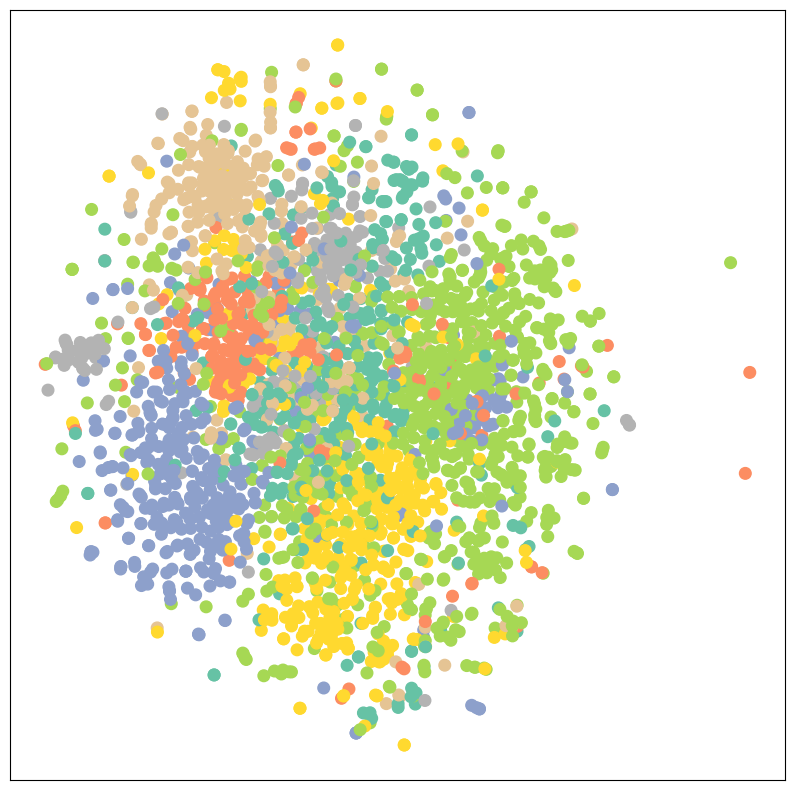

In [4]:
# 可视化部分
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())
    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

visualize(data.x, color=data.y)

<ipython-input-5-642001c84153>:62: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


<Figure size 640x480 with 0 Axes>

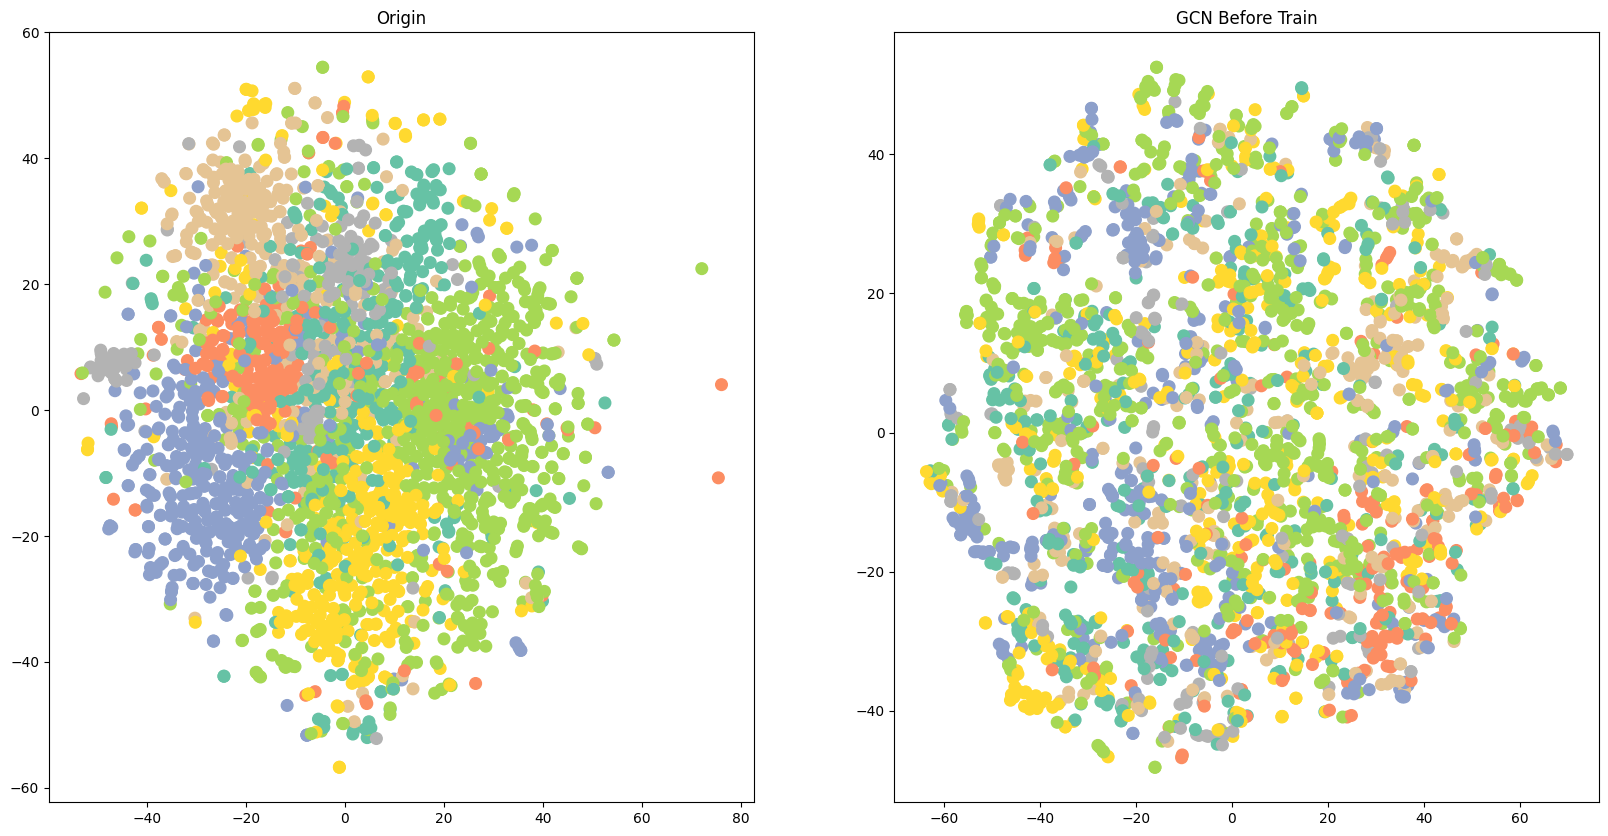

Epoch: 001, Loss: 1.9460
Epoch: 002, Loss: 1.9412
Epoch: 003, Loss: 1.9363
Epoch: 004, Loss: 1.9308
Epoch: 005, Loss: 1.9216
Epoch: 006, Loss: 1.9137
Epoch: 007, Loss: 1.9078
Epoch: 008, Loss: 1.8986
Epoch: 009, Loss: 1.8868
Epoch: 010, Loss: 1.8825
Epoch: 011, Loss: 1.8701
Epoch: 012, Loss: 1.8614
Epoch: 013, Loss: 1.8486
Epoch: 014, Loss: 1.8323
Epoch: 015, Loss: 1.8344
Epoch: 016, Loss: 1.8186
Epoch: 017, Loss: 1.8031
Epoch: 018, Loss: 1.7980
Epoch: 019, Loss: 1.7813
Epoch: 020, Loss: 1.7766
Epoch: 021, Loss: 1.7478
Epoch: 022, Loss: 1.7385
Epoch: 023, Loss: 1.7304
Epoch: 024, Loss: 1.7120
Epoch: 025, Loss: 1.7010
Epoch: 026, Loss: 1.6917
Epoch: 027, Loss: 1.6672
Epoch: 028, Loss: 1.6382
Epoch: 029, Loss: 1.6474
Epoch: 030, Loss: 1.6297
Epoch: 031, Loss: 1.6014
Epoch: 032, Loss: 1.5760
Epoch: 033, Loss: 1.5732
Epoch: 034, Loss: 1.5705
Epoch: 035, Loss: 1.5443
Epoch: 036, Loss: 1.5131
Epoch: 037, Loss: 1.4721
Epoch: 038, Loss: 1.4774
Epoch: 039, Loss: 1.4380
Epoch: 040, Loss: 1.4553


<ipython-input-5-642001c84153>:84: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


<Figure size 640x480 with 0 Axes>

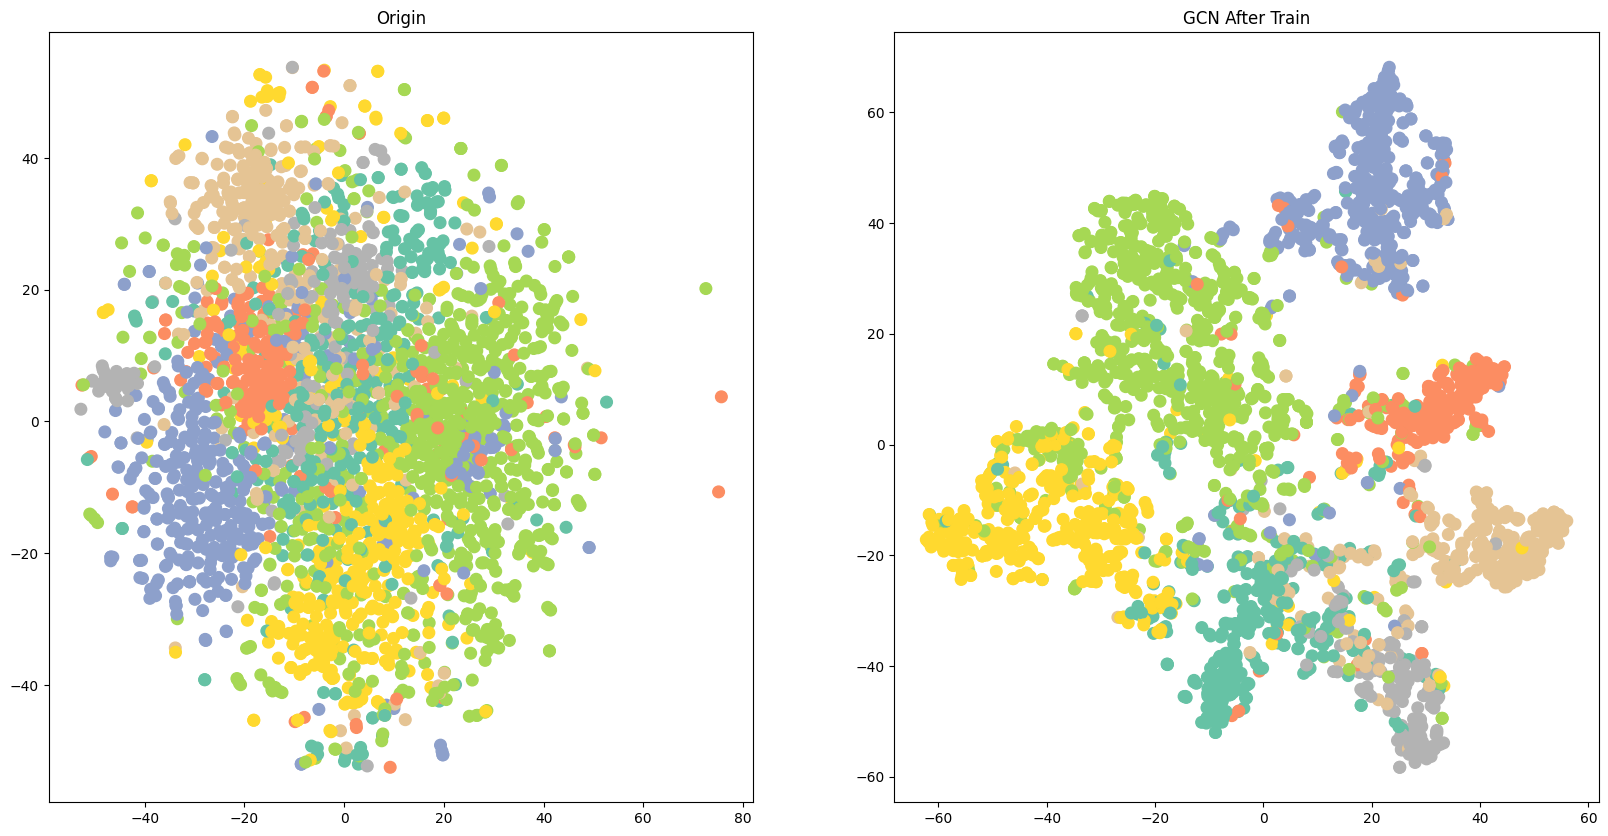

In [5]:
# GCN
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

# GCN网络定义
class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(dataset.num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, dataset.num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

# GCN网络训练函数
def train():
      model.train()
      optimizer.zero_grad()
      out = model(data.x, data.edge_index)
      loss = criterion(out[data.train_mask], data.y[data.train_mask])
      loss.backward()
      optimizer.step()
      return loss

# GCN网络测试函数
def test():
      model.eval()
      out = model(data.x, data.edge_index)
      pred = out.argmax(dim=1)
      test_correct = pred[data.test_mask] == data.y[data.test_mask]
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())
      return test_acc, out



import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize_two(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())
    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")


model = GCN(hidden_channels=16)
#GCN(
#  (conv1): GCNConv(1433, 16)
#  (conv2): GCNConv(16, 7)
#)

# GCN未经训练时的输出——节点表征，及可视化
model.eval()
out = model(data.x, data.edge_index)

plt.figure(1)
fig, ax1 = plt.subplots(figsize=(20, 10))
plt.subplot(1, 2, 1)
visualize_two(data.x, color=data.y) # MLP分类结果可视化
plt.title("Origin")
plt.subplot(1, 2, 2)
visualize_two(out, color=data.y) # 原始数据的可视化
plt.title("GCN Before Train")
plt.show()


# 训练
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()
for epoch in range(1, 201):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

# 测试与可视化
test_acc, out = test()
print(f'Test Accuracy: {test_acc:.4f}')

plt.figure(2)
fig, ax1 = plt.subplots(figsize=(20, 10))
plt.subplot(1, 2, 1)
visualize_two(data.x, color=data.y) # MLP分类结果可视化
plt.title("Origin")
plt.subplot(1, 2, 2)
visualize_two(out, color=data.y) # 原始数据的可视化
plt.title("GCN After Train")
plt.show()